In [1]:
import os, sys
sys.path.append("..")


from track import dummy_nam_gen, dummy_rand_gen, dummy_bezier_gen
from vehicle import dummy_racecar
from vehicle.tools import sin_simulation
from reward.vehicle_status_check import OffCourse_Checker

In [2]:
dummy_nam_gen._reset()
dummy_nam_gen._generate()
nam_track_dict = dummy_nam_gen._calculate_track_dict()

In [3]:
dummy_rand_gen._reset()
dummy_rand_gen._generate()
rand_track_dict = dummy_rand_gen._calculate_track_dict()

In [4]:
dummy_bezier_gen._reset()
dummy_bezier_gen._generate()
bezier_track_dict = dummy_bezier_gen._calculate_track_dict()

In [5]:
import numpy as np
a =np.array( [[1,2,3], [4,5,6]])
b= np.array([[7,8,9], [10,11,12]]) # [5,6,7]
c = np.hstack([a, b])
print(c, c.shape)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]] (2, 6)


In [6]:
c[0][1::3], c[0][0::3], c[0][2::3]

(array([2, 8]), array([1, 7]), array([3, 9]))

In [7]:
left_theta = dummy_bezier_gen._calculate_theta(bezier_track_dict['left'])
right_theta = dummy_bezier_gen._calculate_theta(bezier_track_dict['right'])


In [28]:
bezier_track_dict['x'].max(), bezier_track_dict['x'].min(), bezier_track_dict['y'].max(), bezier_track_dict['y'].min()


(np.float64(640.3617131881747),
 np.float64(-558.8481195540601),
 np.float64(374.8723861694646),
 np.float64(-608.7851263858402))

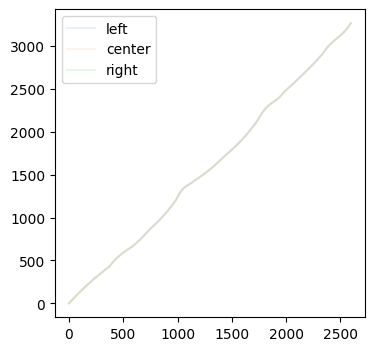

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(4, 4))
plt.plot(left_theta, label='left', alpha=0.1)
plt.plot(bezier_track_dict['theta'], label='center', alpha=0.1)
plt.plot(right_theta, label='right', alpha=0.1)
plt.legend()

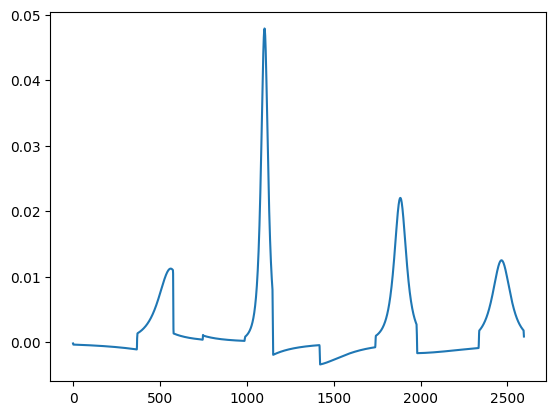

In [9]:
import matplotlib.pyplot as plt
plt.plot(bezier_track_dict['kappa'])

In [10]:
# dummy_racecar._reset(track_dict=bezier_track_dict)
# oc_checker = OffCourse_Checker(car_obj=dummy_racecar, track_dict=bezier_track_dict)
dummy_racecar._reset(track_dict=nam_track_dict) 


In [11]:
import math
math.degrees(0.4)

22.918311805232932

In [12]:
import numpy as np
f = 1
dt = 1/60
v = 30 ## 속도는 여기서는 큰 의미가 있지는 않음.
t = 0
A = np.deg2rad(60)

_, com_arr, all_arr, instance_arr = sin_simulation(
    num_step=300, freq=f, dt=dt, max_deg=22,
    race_car=dummy_racecar,
    debug_oc=True
)

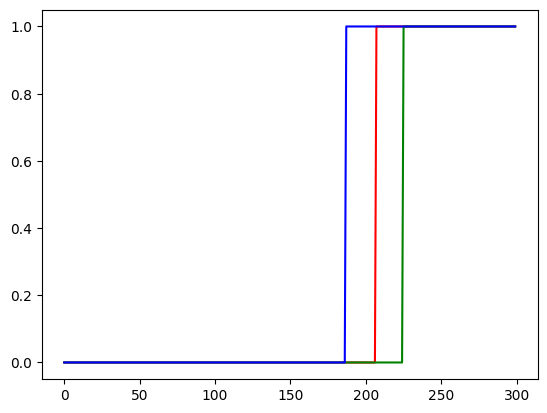

In [13]:
plt.plot(com_arr, 'r')
plt.plot(all_arr, 'g')
plt.plot(instance_arr, 'b')

In [14]:
traj_arr = dummy_racecar.bicycle_model.car_traj_arr

In [15]:
len(traj_arr), len(dummy_racecar.bicycle_model.ref_arr_dict['center'])

(301, 300)

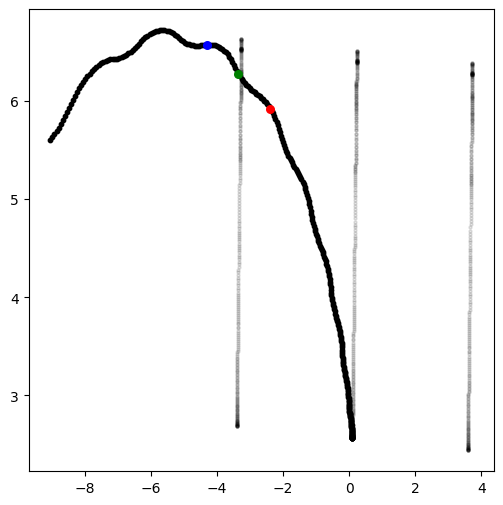

In [52]:
import matplotlib.pyplot as plt
from PIL import Image
### 남양 트랙은 정상적으로 

fig, ax = plt.subplots(figsize=(6, 6))
for i, (x, y, phi, vx, vy) in enumerate(traj_arr[1:]):
    plt.scatter(x, y, c='k', s=10)
    plt.scatter(dummy_racecar.bicycle_model.ref_arr_dict['center'][i][0],
                dummy_racecar.bicycle_model.ref_arr_dict['center'][i][1],
                s=5, c='k', alpha=0.1)
    plt.scatter(dummy_racecar.bicycle_model.ref_arr_dict['left'][i][0],
                dummy_racecar.bicycle_model.ref_arr_dict['left'][i][1],
                s=5, c='k', alpha=0.1)
    plt.scatter(dummy_racecar.bicycle_model.ref_arr_dict['right'][i][0],
                dummy_racecar.bicycle_model.ref_arr_dict['right'][i][1],
                s=5, c='k', alpha=0.1)

    ref_x, ref_y = dummy_racecar.bicycle_model.ref_arr_dict['center'][i]
    # plt.plot([x, ref_x], [y, ref_y], color='g')

a =np.where(np.array(instance_arr, dtype=int) != 0)[0][0]
b = np.where(np.array(com_arr, dtype=int) != 0)[0][0]
c = np.where(np.array(all_arr, dtype=int) != 0)[0][0]

plt.scatter(traj_arr[1:][a][0], traj_arr[1:][a][1], s=30, c='r')
plt.scatter(traj_arr[1:][b][0], traj_arr[1:][b][1], s=30, c='g')
plt.scatter(traj_arr[1:][c][0], traj_arr[1:][c][1], s=30, c='b')

canvas = fig.canvas
canvas.draw()

renderer = canvas.get_renderer()
width, height = canvas.get_width_height()
image_array = np.frombuffer(canvas.tostring_argb(), dtype='uint8')
# image_array = np.frombuffer(renderer.buffer_rgba(),) # dtype='uint8')
image_array = image_array.reshape(height, width, 4)



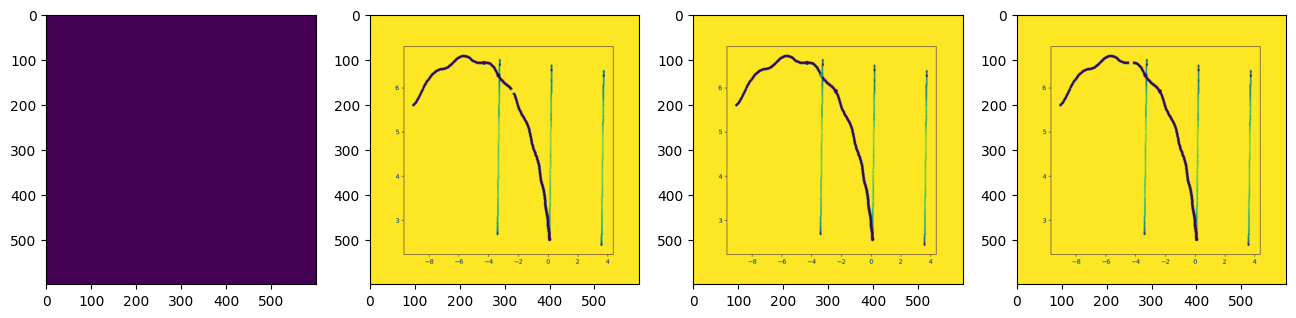

In [54]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
for ch in range(4):
    ax[ch].imshow(image_array[:, :, ch].astype(float) / 255.)

In [22]:
import gymnasium as gym

space = gym.spaces.Dict({
    'a': gym.spaces.Box(low=2, high=4, shape=(20,)),
    'b': gym.spaces.Box(low=-1, high=1, shape=(10,))
})

In [31]:
for ekey, value in space.items():
    print(value.low.size, ekey)

20 a
10 b


In [34]:
value.shape[0]

10

In [37]:
a = False;b=True
print(a|b)

True


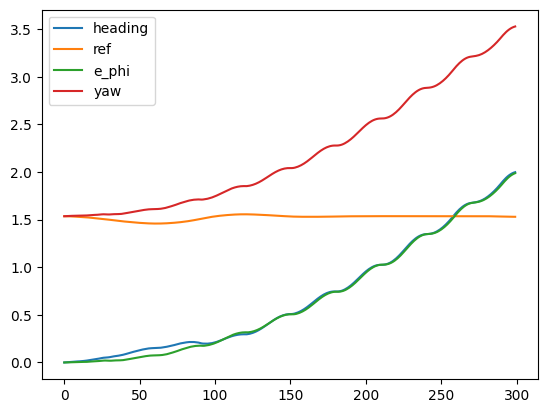

In [17]:
ref_phi = np.array(dummy_racecar.bicycle_model.ref_arr_dict['phi'])
car_phi = np.array(dummy_racecar.bicycle_model.car_traj_arr).T[2][1:]

# heading_angle = ref_phi - car_phi
heading_angle = car_phi - ref_phi ### 초반에 차이가 있는 것 제외 하고 이후 heading angle의 오차는 거의 일정함.

plt.plot(heading_angle, label='heading')
plt.plot(dummy_racecar.bicycle_model.ref_arr_dict['phi'], label='ref')
plt.plot(dummy_racecar.bicycle_model.e_phi_arr, label='e_phi')
plt.plot(car_phi, label='yaw')
plt.legend()

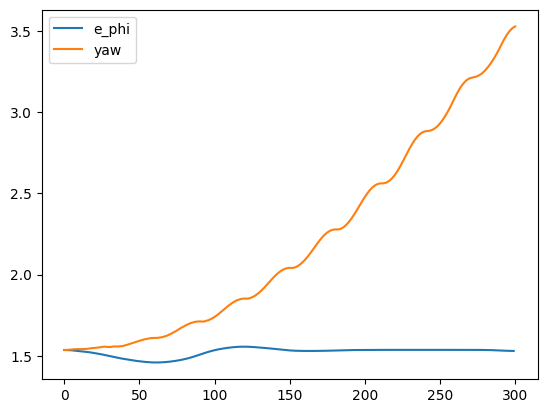

In [21]:
import numpy as np
plt.plot(dummy_racecar.bicycle_model.ref_arr_dict['phi'], label='e_phi')
plt.plot(np.array(dummy_racecar.bicycle_model.car_traj_arr).T[2], label='yaw')
plt.legend()


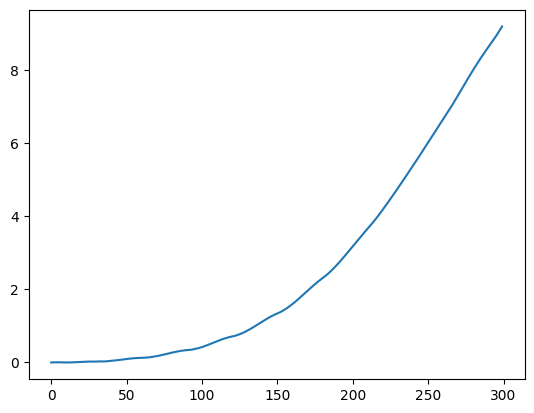

In [19]:
plt.plot(dummy_racecar.bicycle_model.e_c_arr)

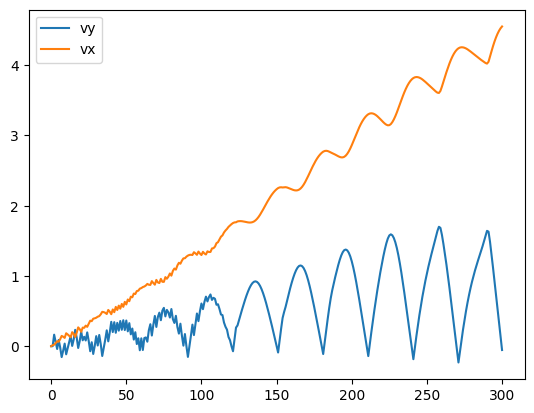

In [20]:
plt.plot(np.array(dummy_racecar.bicycle_model.car_traj_arr).T[-1], label='vy')
plt.plot(np.array(dummy_racecar.bicycle_model.car_traj_arr).T[-2], label='vx')
plt.legend()